###  IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

### LOAD DATASET 

In [4]:
df = pd.read_csv("bank-dataset.csv", sep=";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

### Handle missing values or unknown categories 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
df.replace("unknown", np.nan, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [11]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1936\1842323058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_1936\1842323058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [31]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

### Encode all categorical features

In [32]:
X = df.drop("y", axis=1)
y = df["y"] 

### Split dataset into train-test sets 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y
)

### Train Decision Tree Classifier 

In [34]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,        # Prevent overfitting
    random_state=42
)


In [35]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Model Evaluation


In [37]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [38]:
train_acc, test_acc

(0.9016456293500059, 0.9003804299743431)

In [39]:
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.95      9981\n           1       0.63      0.35      0.45      1322\n\n    accuracy                           0.90     11303\n   macro avg       0.78      0.66      0.70     11303\nweighted avg       0.89      0.90      0.89     11303\n'

### Visualize Decision Tree

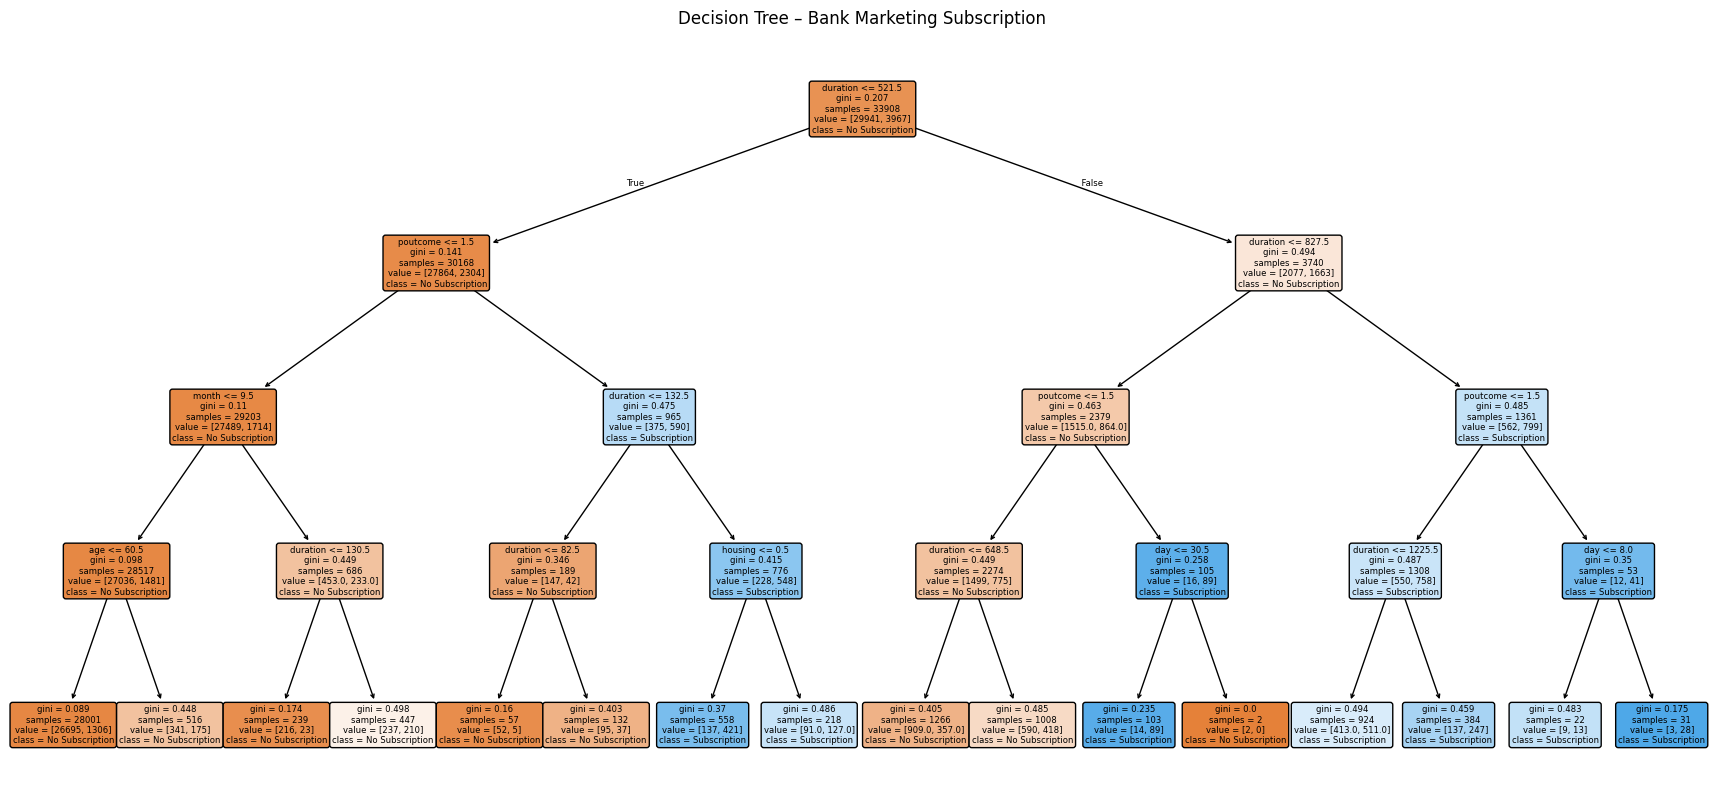

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No Subscription", "Subscription"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree – Bank Marketing Subscription")
plt.show()
plt.savefig("decision_tree.png")

### Compare train accuracy vs test accuracy 

In [43]:
train_acc - test_acc

0.0012651993756628288

### Write 3 key rules

1. If duration of last contact is high AND previous outcome was successful,
   then customer is likely to subscribe.

2. If contact duration is low AND campaign calls are high,
   then customer is unlikely to subscribe.

3. If customer is contacted via cellular AND has housing loan = No,
   probability of subscription increases.